## Ensemble Techniques - Parkinsons Project

### Importing Libraries

In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline
from sklearn.tree import export_graphviz

### Reading Data

In [ ]:
#Reading Data
df1=pd.read_csv("Data - Parkinsons",encoding='utf-8')
df2=pd.read_csv("Data - parkinsons.names",encoding='utf-8',error_bad_lines=False)
print(df1.head())
print(df2.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

b'Skipping line 20: expected 1 fields, saw 2\nSkipping line 21: expected 1 fields, saw 3\nSkipping line 22: expected 1 fields, saw 2\nSkipping line 30: expected 1 fields, saw 2\nSkipping line 31: expected 1 fields, saw 2\nSkipping line 33: expected 1 fields, saw 2\nSkipping line 38: expected 1 fields, saw 2\nSkipping line 39: expected 1 fields, saw 2\nSkipping line 43: expected 1 fields, saw 2\nSkipping line 44: expected 1 fields, saw 5\nSkipping line 45: expected 1 fields, saw 2\nSkipping line 57: expected 1 fields, saw 5\nSkipping line 59: expected 1 fields, saw 6\nSkipping line 60: expected 1 fields, saw 2\nSkipping line 61: expected 1 fields, saw 2\nSkipping line 62: expected 1 fields, saw 2\nSkipping line 64: expected 1 fields, saw 3\nSkipping line 70: expected 1 fields, saw 2\nSkipping line 71: expected 1 fields, saw 2\nSkipping line 72: expected 1 fields, saw 5\nSkipping line 73: expected 1 fields, saw 2\n'


### EDA Analysis

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [ ]:
df1.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


"MDVP:Fhi(Hz)" have maximum value 592.03  where 75% of data is within 224.2055
We should check with outliers in the variable

In [ ]:
#Checking skew values for each variable
df1.skew()

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

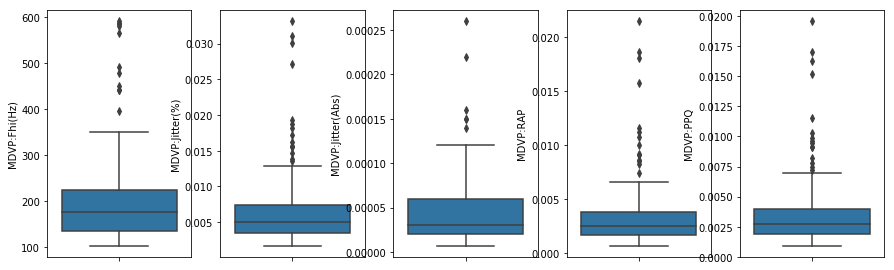

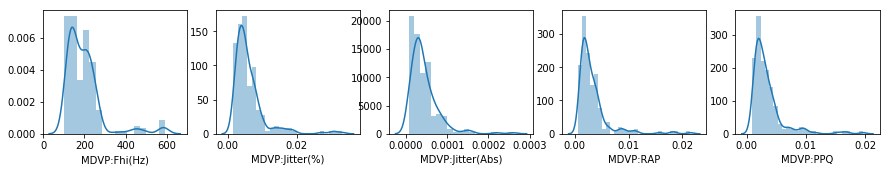

In [ ]:
# plotting variable which having high skew values
plt.figure(figsize=(15,10))
plt.subplot(2,5,1)
sns.boxplot(df1["MDVP:Fhi(Hz)"],orient='vertical')
plt.subplot(2,5,2)
sns.boxplot(df1["MDVP:Jitter(%)"],orient='vertical')
plt.subplot(2,5,3)
sns.boxplot(df1["MDVP:Jitter(Abs)"],orient='vertical')
plt.subplot(2,5,4)
sns.boxplot(df1["MDVP:RAP"],orient='vertical')
plt.subplot(2,5,5)
sns.boxplot(df1["MDVP:PPQ"],orient='vertical')

plt.figure(figsize=(15,5))
plt.subplot(2,5,1)
sns.distplot(df1["MDVP:Fhi(Hz)"])
plt.subplot(2,5,2)
sns.distplot(df1["MDVP:Jitter(%)"])
plt.subplot(2,5,3)
sns.distplot(df1["MDVP:Jitter(Abs)"])
plt.subplot(2,5,4)
sns.distplot(df1["MDVP:RAP"])
plt.subplot(2,5,5)
sns.distplot(df1["MDVP:PPQ"])

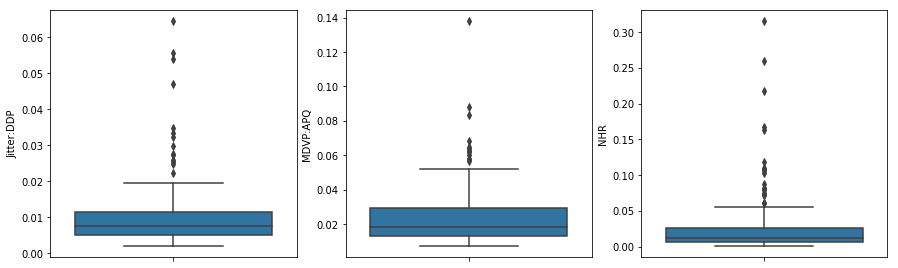

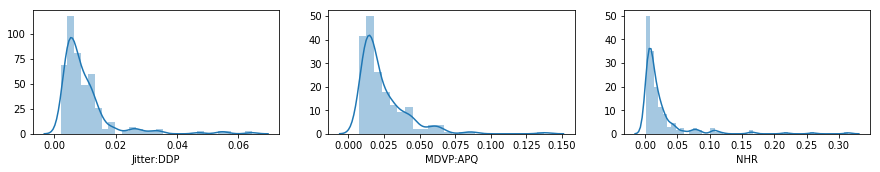

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(df1["Jitter:DDP"],orient='vertical')
plt.subplot(2,3,2)
sns.boxplot(df1["MDVP:APQ"],orient='vertical')
plt.subplot(2,3,3)
sns.boxplot(df1["NHR"],orient='vertical')


plt.figure(figsize=(15,5))
plt.subplot(2,3,1)
sns.distplot(df1["Jitter:DDP"])
plt.subplot(2,3,2)
sns.distplot(df1["MDVP:APQ"])
plt.subplot(2,3,3)
sns.distplot(df1["NHR"])


We could see all the above variables are positively skewed

In [ ]:
# Finding no of Missing value
df1.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

No Missing value in the data

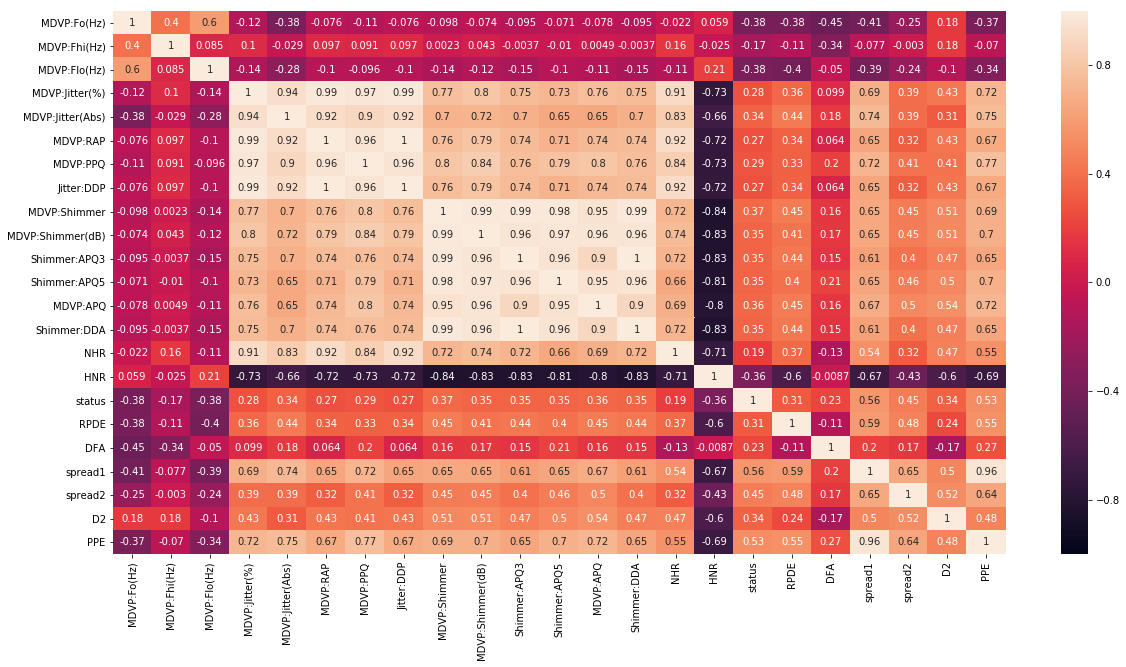

In [ ]:
#finding correlation between variables
corr=df1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

when we look at the target variable "status", most the independent variable are equally around 0.36 and some have negative correlation with all the variables (HNR, MDVP:Fo(Hz), MDVP:Flo(Hz))

We could see perfect correlation between independent variables which is multicollinearity issue (Jitter:DDP & MDVP:RAP, Shimmer:DDA & Shimmer:APQ3)

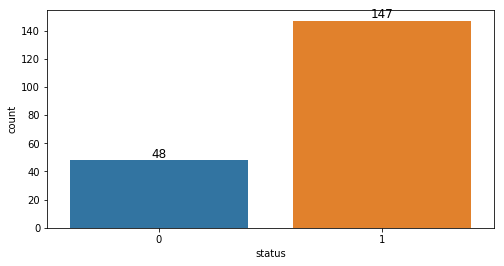

In [ ]:
#Count plot of target variable
fig, ax = plt.subplots(figsize=(8,4))
ax=sns.countplot(x='status',data=df1)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),fontsize=12, ha='center', va='bottom')

Samples are not balanced so we should do stratified split

In [ ]:
# selecting independent and dependent variables
df1=df1.drop(["name","MDVP:RAP","Shimmer:APQ3"],axis=1)
X=df1.drop(["status"],axis=1)
y=df1["status"]

* Removing "name" since it is unique
* Jitter:DDP & MDVP:RAP, Shimmer:DDA & Shimmer:APQ3 are perfectly correlated so removing "MDVP:RAP" and "Shimmer:APQ3"

### Splitting of Data

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

#### Logistic Regression

In [ ]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression # import the functions
lr=LogisticRegression(random_state=100,solver='lbfgs') #call the function
lr.fit(X_train,y_train)# fit the model

#see the error parameters
from sklearn import metrics

#make prediction
lr_test_pred=lr.predict(X_test)
lr_train_pred=lr.predict(X_train)

# Accuracy of model
from sklearn import metrics
lr_acc=metrics.accuracy_score(y_test,lr_test_pred)
print("Accuracy for test data: {}".format(lr_acc))
print("Accuracy  for train data: {}".format(metrics.accuracy_score(y_train,lr_train_pred)))


Accuracy for test data: 0.7966101694915254
Accuracy  for train data: 0.9117647058823529


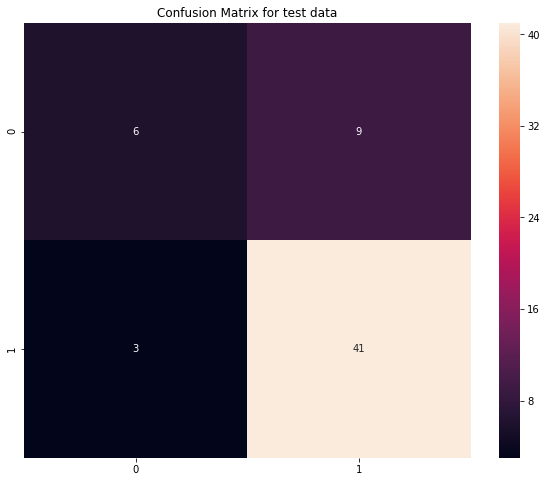

In [ ]:
#Confusion Matrix for Logistic Regression
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,lr_test_pred))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')


#### Logistic Regression with Stratified K - Fold Validation

In [ ]:
#Doing K- fold Stratified Cross Validation since the data is unbalanced and this will help in balanced sampling
# cross validation for Logistic regression
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
i=1
cv_score=[]
for train,test in skf.split(X,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = X.loc[train], X.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #LR Model
    lr=LogisticRegression(random_state=24,solver='liblinear') #call the function
    lr.fit(train_X,train_y)# fit the model
    #make prediction
    lr_test_pred=lr.predict(test_X)
    lr_train_pred=lr.predict(train_X)
    score=metrics.accuracy_score(test_y,lr_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.85
2 of KFold 10
Accuracy for test data: 0.8
3 of KFold 10
Accuracy for test data: 0.8
4 of KFold 10
Accuracy for test data: 0.8
5 of KFold 10
Accuracy for test data: 0.95
6 of KFold 10
Accuracy for test data: 0.9
7 of KFold 10
Accuracy for test data: 0.95
8 of KFold 10
Accuracy for test data: 0.7894736842105263
9 of KFold 10
Accuracy for test data: 0.8888888888888888
10 of KFold 10
Accuracy for test data: 0.9444444444444444


Accuracy [0.85, 0.8, 0.8, 0.8, 0.95, 0.9, 0.95, 0.7894736842105263, 0.8888888888888888, 0.9444444444444444] 
Mean of Accuracy 0.867280701754386 
 SD of Accuracy 0.0641165400947671


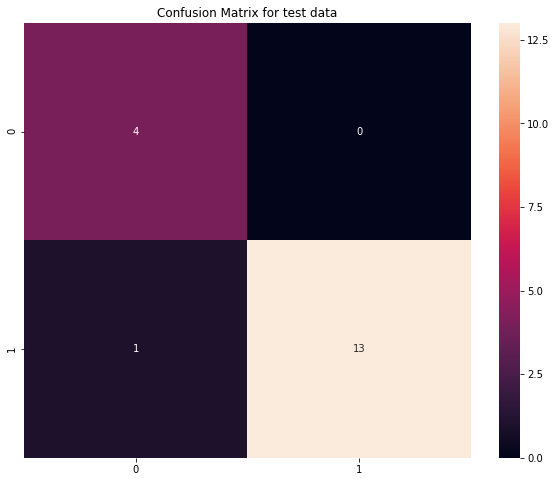

In [ ]:
#Confusion Matrix 
con_mat=pd.DataFrame(metrics.confusion_matrix(test_y,lr.predict(test_X)))
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')
lr_avg=np.mean(cv_score)
lr_sd=np.std(cv_score)
print('Accuracy',cv_score,'\nMean of Accuracy',np.mean(cv_score),"\n SD of Accuracy",np.std(cv_score))

#### Decision Tree Classifier

In [ ]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=4)
dtree.fit(X_train,y_train)#fitting model

#Predicting model
dtree_test=dtree.predict(X_test)
dtree_train=dtree.predict(X_train)

#Accuracy of model
dtree_acc=dtree.score(X_test,y_test)
print("Accuracy for test data: {}".format(dtree_acc))
print("Accuracy for train data: {}".format(dtree.score(X_train,y_train)))




Accuracy for test data: 0.8305084745762712
Accuracy for train data: 0.9779411764705882


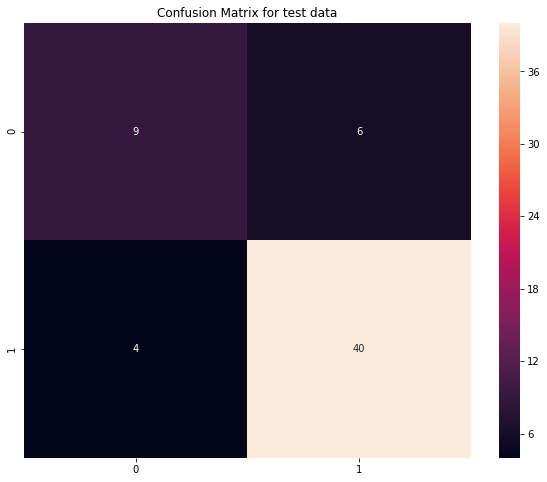

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,dtree_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

In [ ]:
#finding feature importance using Decision tree
feature_imp=pd.DataFrame(dtree.feature_importances_,columns = ["Imp"], index = X.columns)
feature_imp

,Imp
MDVP:Fo(Hz),0.275807
MDVP:Fhi(Hz),0.000000
MDVP:Flo(Hz),0.000000
MDVP:Jitter(%),0.000000
MDVP:Jitter(Abs),0.000000
MDVP:PPQ,0.000000
Jitter:DDP,0.000000
MDVP:Shimmer,0.000000
MDVP:Shimmer(dB),0.000000
Shimmer:APQ5,0.000000


MDVP:Fo(Hz), MDVP:APQ, HNR, PPE and spread1 are the variables that contributing to explain variability in the model

In [ ]:
#Decision Tree Visualization
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

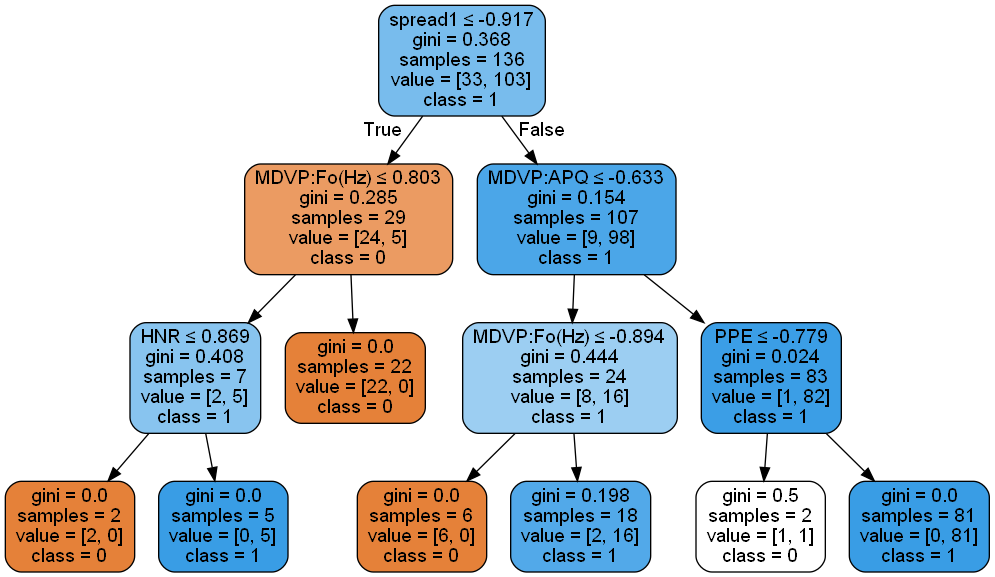

In [ ]:
feature_cols=X.columns
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('status_tree.png')
Image(graph.create_png())

#### Decision Tree Classifier with Stratified K - Fold Validation

In [ ]:
# cross validation for Decision Tree

from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
i=1
cv_score=[]
for train,test in skf.split(X,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = X.loc[train], X.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #Decision Tree Model
    tree=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=24) #call the function
    tree.fit(train_X,train_y)# fit the model
    #make prediction
    tree_test_pred=tree.predict(test_X)
    tree_train_pred=tree.predict(train_X)
    score=metrics.accuracy_score(test_y,tree_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.9
2 of KFold 10
Accuracy for test data: 0.85
3 of KFold 10
Accuracy for test data: 0.8
4 of KFold 10
Accuracy for test data: 1.0
5 of KFold 10
Accuracy for test data: 0.95
6 of KFold 10
Accuracy for test data: 0.75
7 of KFold 10
Accuracy for test data: 0.8
8 of KFold 10
Accuracy for test data: 0.8421052631578947
9 of KFold 10
Accuracy for test data: 0.9444444444444444
10 of KFold 10
Accuracy for test data: 0.8333333333333334


Accuracy [0.9, 0.85, 0.8, 1.0, 0.95, 0.75, 0.8, 0.8421052631578947, 0.9444444444444444, 0.8333333333333334] 
Mean of Accuracy 0.8669883040935673 
 SD of Accuracy 0.07508250993024172


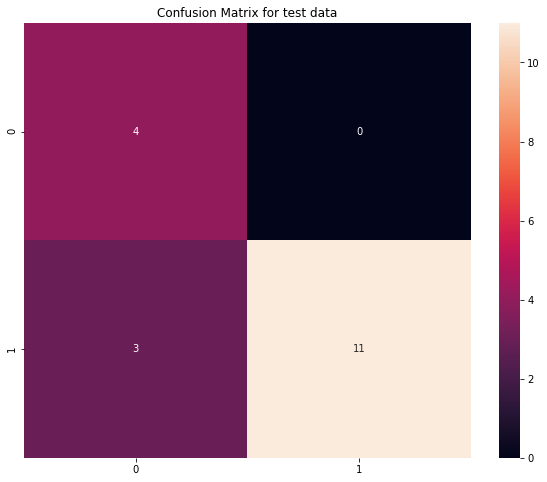

In [ ]:
#Confusion Matrix 
con_mat=pd.DataFrame(metrics.confusion_matrix(test_y,tree.predict(test_X)))
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')
tree_avg=np.mean(cv_score)
tree_sd=np.std(cv_score)

print('Accuracy',cv_score,'\nMean of Accuracy',np.mean(cv_score),"\n SD of Accuracy",np.std(cv_score))

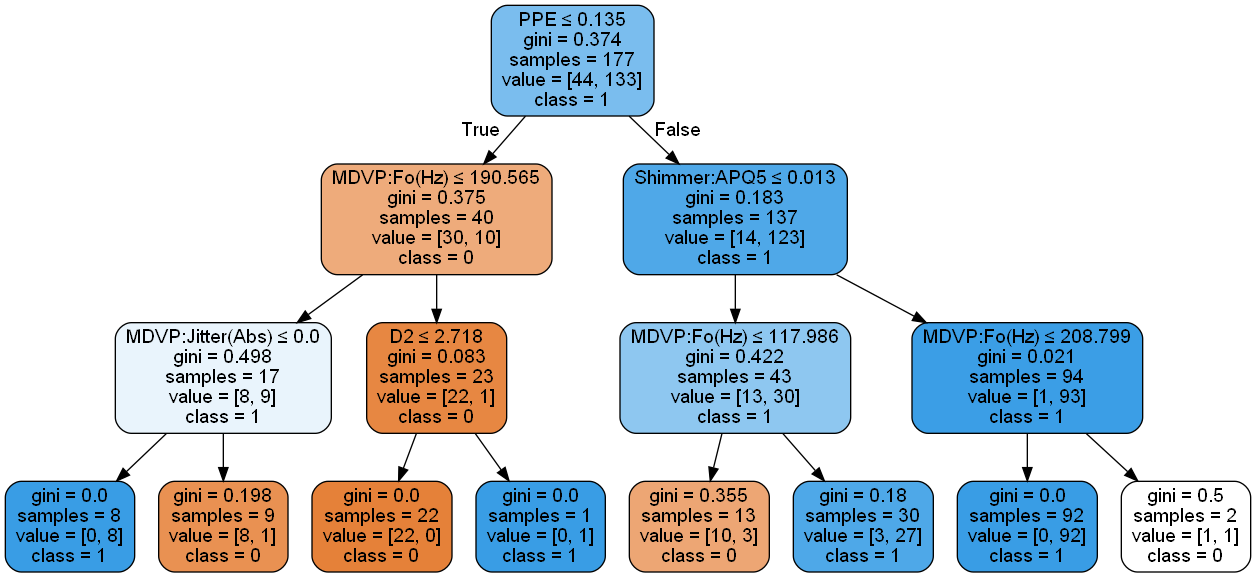

In [ ]:
feature_cols=X.columns
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('status_tree.png')
Image(graph.create_png())

#### K- Neighbors Classifier

In [ ]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
scores=[]

for k in range(1,20):
    KNN=KNeighborsClassifier(n_neighbors=k,weights="distance")
    KNN.fit(X_train,y_train)
    knn_test=KNN.predict(X_test)
    scores.append(KNN.score(X_test,y_test))

Text(0.5, 1.0, 'Accuracy plot for different K value')

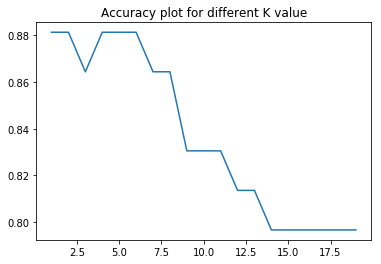

In [ ]:
plt.plot(range(1,20),scores)
plt.title("Accuracy plot for different K value")

In [ ]:
#K Neighbor Classifier
KNN=KNeighborsClassifier(n_neighbors=3,weights="distance")
KNN.fit(X_train,y_train)
knn_test=KNN.predict(X_test)
knn_acc=KNN.score(X_test,y_test)
print("Accuracy for test data:{}".format(KNN.score(X_test,y_test)))
print("Accuracy for train data:{}".format(KNN.score(X_train,y_train)))


Accuracy for test data:0.864406779661017
Accuracy for train data:1.0


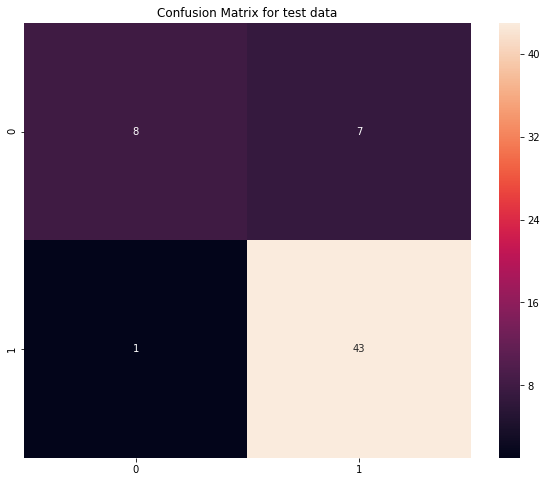

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,knn_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

#### K- Neighbors Classifier with Stratified K - Fold Classifier

In [ ]:
#KNN with Stratified K-fold 
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
i=1
cv_score=[]
for train,test in skf.split(X,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = X.loc[train], X.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #KNN Model
    knn_kf=KNeighborsClassifier(n_neighbors=5,weights='distance') #call the function
    knn_kf.fit(train_X,train_y)# fit the model
    #make prediction
    knn_kf_test_pred=knn_kf.predict(test_X)
    knn_kf_train_pred=knn_kf.predict(train_X)
    score=metrics.accuracy_score(test_y,knn_kf_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.85
2 of KFold 10
Accuracy for test data: 0.85
3 of KFold 10
Accuracy for test data: 0.9
4 of KFold 10
Accuracy for test data: 0.75
5 of KFold 10
Accuracy for test data: 0.95
6 of KFold 10
Accuracy for test data: 0.85
7 of KFold 10
Accuracy for test data: 0.9
8 of KFold 10
Accuracy for test data: 0.7368421052631579
9 of KFold 10
Accuracy for test data: 0.8888888888888888
10 of KFold 10
Accuracy for test data: 0.8888888888888888


Accuracy [0.85, 0.85, 0.9, 0.75, 0.95, 0.85, 0.9, 0.7368421052631579, 0.8888888888888888, 0.8888888888888888] 
Mean of Accuracy 0.8564619883040935 
 SD of Accuracy 0.06357029775836866


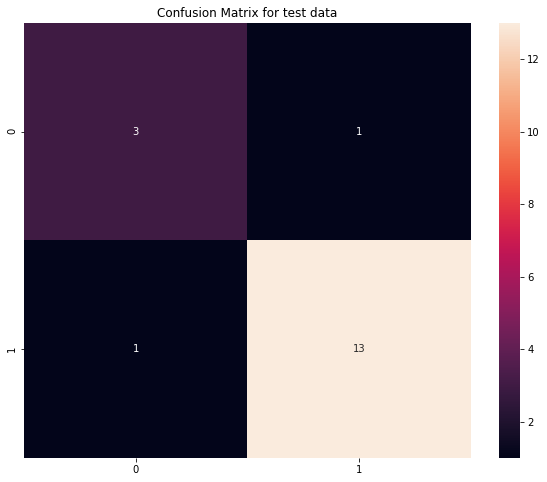

In [ ]:
con_mat=pd.DataFrame(metrics.confusion_matrix(test_y,knn_kf.predict(test_X)))
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')
knn_avg=np.mean(cv_score)
knn_sd=np.std(cv_score)
print('Accuracy',cv_score,'\nMean of Accuracy',np.mean(cv_score),"\n SD of Accuracy",np.std(cv_score))

#### Support Vector Machine

In [ ]:
#Support Vector Machine
from sklearn import svm
clf = svm.SVC(kernel='rbf',gamma=0.06, C=3)

#fitting and predicting model
clf.fit(X_train , y_train)
clf_test_pred = clf.predict(X_test)
clf_train_pred = clf.predict(X_train)

In [ ]:
#Accuracy score for Train and Test data
svm_acc=metrics.accuracy_score(y_test, clf_test_pred)
print("Train data accuracy for SVM Model: {0:2.2f}%".format(metrics.accuracy_score(y_train, clf_train_pred)*100))
print("Test data accuracy for SVM Model: {0:2.2f}%".format(metrics.accuracy_score(y_test, clf_test_pred)*100))

Train data accuracy for SVM Model: 95.59%
Test data accuracy for SVM Model: 86.44%


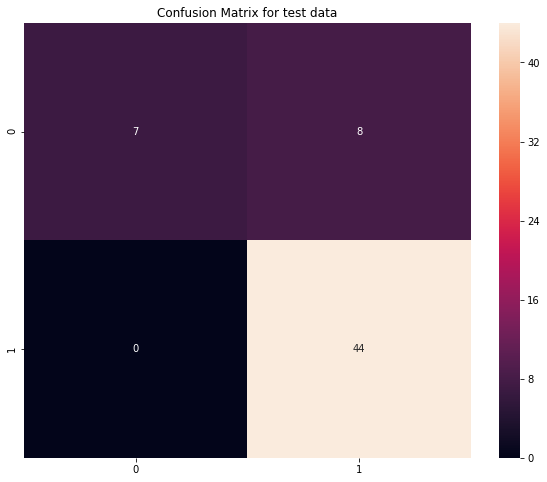

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,clf_test_pred))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

#### Support Vector Machine with Stratified K - Fold Classifier

In [ ]:
#SVM with stratified K-fold 
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=100)
i=1
cv_score=[]
for train,test in skf.split(X,y):
    print('{} of KFold {}'.format(i,skf.n_splits))
    train_X, test_X = X.loc[train], X.loc[test] 
    train_y, test_y = y.loc[train], y.loc[test]
    
    #Decision Tree Model
    svm_kf=svm.SVC(gamma=0.06,C=3) #call the function
    svm_kf.fit(train_X,train_y)# fit the model
    #make prediction
    svm_kf_test_pred=svm_kf.predict(test_X)
    svm_kf_train_pred=svm_kf.predict(train_X)
    score=metrics.accuracy_score(test_y,svm_kf_test_pred)
    print("Accuracy for test data: {}".format(score))
    cv_score.append(score)    
    i+=1

1 of KFold 10
Accuracy for test data: 0.75
2 of KFold 10
Accuracy for test data: 0.8
3 of KFold 10
Accuracy for test data: 0.8
4 of KFold 10
Accuracy for test data: 0.8
5 of KFold 10
Accuracy for test data: 0.85
6 of KFold 10
Accuracy for test data: 0.85
7 of KFold 10
Accuracy for test data: 0.8
8 of KFold 10
Accuracy for test data: 0.7368421052631579
9 of KFold 10
Accuracy for test data: 0.7777777777777778
10 of KFold 10
Accuracy for test data: 0.8888888888888888


Accuracy [0.75, 0.8, 0.8, 0.8, 0.85, 0.85, 0.8, 0.7368421052631579, 0.7777777777777778, 0.8888888888888888] 
Mean of Accuracy 0.8053508771929824 
 SD of Accuracy 0.044269247258837914


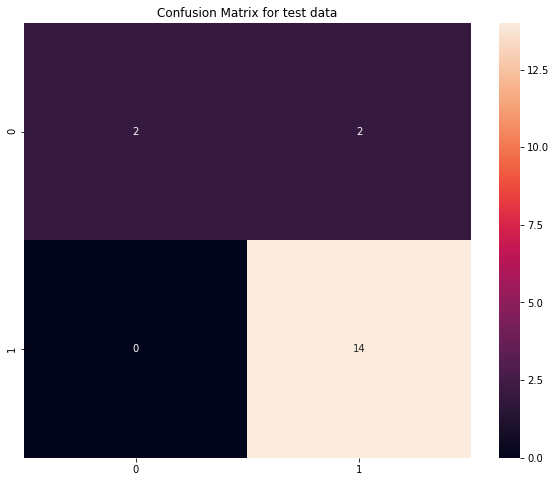

In [ ]:
con_mat=pd.DataFrame(metrics.confusion_matrix(test_y,svm_kf.predict(test_X)))
plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')
svm_avg=np.mean(cv_score)
svm_sd=np.std(cv_score)
print('Accuracy',cv_score,'\nMean of Accuracy',np.mean(cv_score),"\n SD of Accuracy",np.std(cv_score))

In [ ]:
# Bagging with Decision Tree Classifier
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier(n_estimators=10, random_state=100)
bgc.fit(X_train,y_train)
bgc_test=bgc.predict(X_test)
bgc_train=bgc.predict(X_train)

bag_acc=metrics.accuracy_score(y_test, bgc_test)

#Accuracy score for Train and Test data
print("Train data accuracy for Bagging with Decision Tree Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_train, bgc_train)*100))
print("Test data accuracy for Bagging with Decision Tree Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_test, bgc_test)*100))

Train data accuracy for Bagging with Decision Tree Classifier: 99.26%
Test data accuracy for Bagging with Decision Tree Classifier: 79.66%


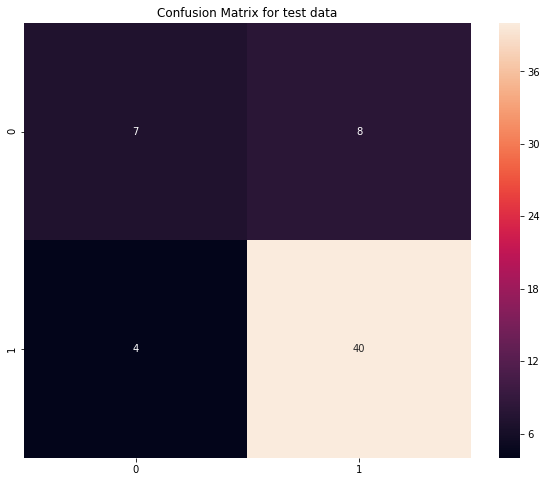

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,bgc_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

In [ ]:
# AdaBoosting Classifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(n_estimators=10, random_state=100)
abc.fit(X_train,y_train)
abc_train=abc.predict(X_train)
abc_test=abc.predict(X_test)

abc_acc=metrics.accuracy_score(y_test, abc_test)

#Accuracy score for Train and Test data
print("Train data accuracy for AdaBoosting Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_train, abc_train)*100))
print("Test data accuracy for AdaBoosting Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_test, abc_test)*100))

Train data accuracy for AdaBoosting Classifier: 99.26%
Test data accuracy for AdaBoosting Classifier: 83.05%


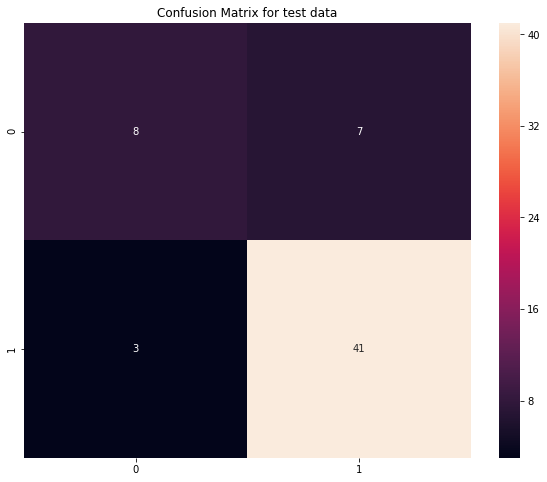

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,abc_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

In [ ]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 5,random_state=1)
gbc = gbc.fit(X_train, y_train)

gbc_test=gbc.predict(X_test)
gbc_train=gbc.predict(X_train)

gbc_acc=metrics.accuracy_score(y_test, gbc_test)
#Accuracy score for Train and Test data
print("Train data accuracy for Gradient Boosting with Decision Tree Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_train, gbc_train)*100))
print("Test data accuracy for Gradient Boosting  with Decision Tree Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_test, gbc_test)*100))


Train data accuracy for Gradient Boosting with Decision Tree Classifier: 97.79%
Test data accuracy for Gradient Boosting  with Decision Tree Classifier: 79.66%


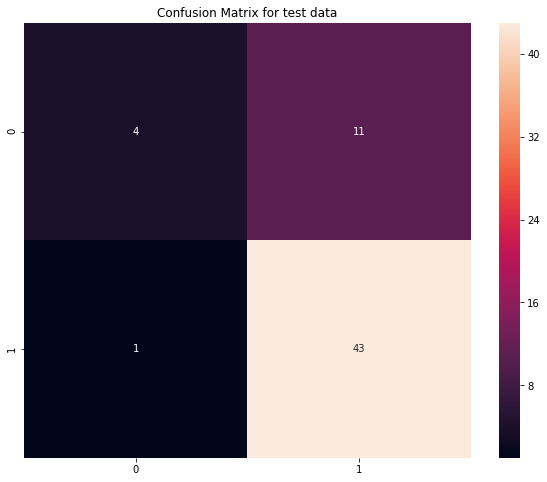

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,gbc_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, random_state=100,max_features=3)
rfc = rfc.fit(X_train, y_train)
rfc_test=rfc.predict(X_test)
rfc_train=rfc.predict(X_train)

rfc_acc=metrics.accuracy_score(y_test, rfc_test)
#Accuracy score for Train and Test data
print("Train data accuracy for Random Forest Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_train, rfc_train)*100))
print("Test data accuracy for Random Forest Classifier: {0:2.2f}%".format(metrics.accuracy_score(y_test, rfc_test)*100))


Train data accuracy for Random Forest Classifier: 99.26%
Test data accuracy for Random Forest Classifier: 83.05%


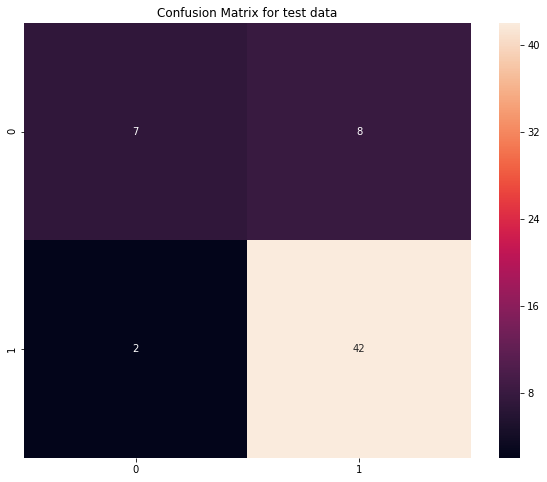

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,rfc_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

In [ ]:
# Stacking Model

model=[]
model.append(('LR',LogisticRegression(solver='lbfgs')))
model.append(('KNN',KNeighborsClassifier(n_neighbors=5,weights='distance')))
model.append(('SVC',svm.SVC(gamma=0.05, C=3)))
model.append(('Decision Tree',DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=100)))
#model.append(('Random Forest',RandomForestClassifier(n_estimators = 10, random_state=100,max_features=3)))
model.append(('Gradient Boosting',GradientBoostingClassifier(n_estimators = 50,random_state=100)))

from sklearn.ensemble import VotingClassifier
stack_model=VotingClassifier(estimators=model,voting='hard')
stack_model.fit(X_train,y_train)
stack_model_test=stack_model.predict(X_test)
stack_model_train=stack_model.predict(X_train)

stack_acc=metrics.accuracy_score(y_test, stack_model_test)
#Accuracy score for Train and Test data
print("Train data accuracy for Stacking Model: {0:2.2f}%".format(metrics.accuracy_score(y_train, stack_model_train)*100))
print("Test data accuracy for Stacking Model: {0:2.2f}%".format(metrics.accuracy_score(y_test, stack_model_test)*100))


Train data accuracy for Stacking Model: 95.59%
Test data accuracy for Stacking Model: 84.75%


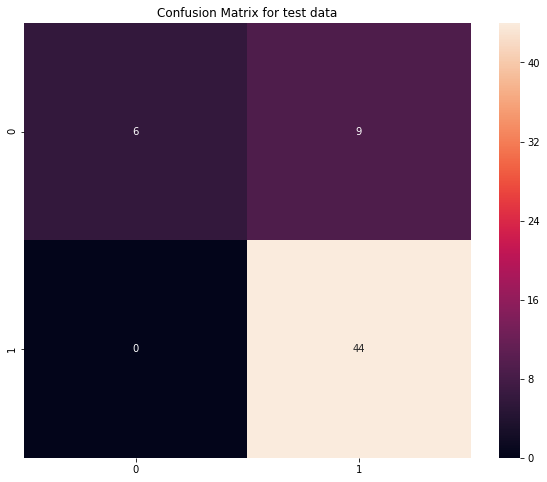

In [ ]:
#Confusion Matrix
con_mat=pd.DataFrame(metrics.confusion_matrix(y_test,stack_model_test))

plt.figure(figsize=(10,8))
plt.title("Confusion Matrix for test data")
sns.heatmap(con_mat,annot=True,fmt='g')

### Comparison of Accuracy Table

,Standalone Model,Test Accuracy
0,Logistic Regression,0.796610
1,Decision Tree,0.830508
2,KNN,0.864407
3,SVM,0.864407


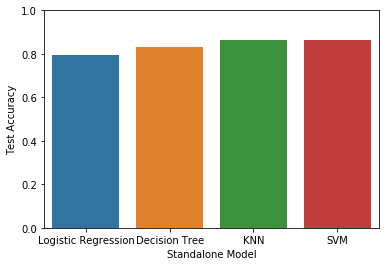

In [ ]:
# Accuracy Table of Standalone model
standalone_models=pd.DataFrame({'Standalone Model':['Logistic Regression','Decision Tree','KNN','SVM'],'Test Accuracy':[lr_acc,dtree_acc,knn_acc,svm_acc]})
bar_plt=sns.barplot('Standalone Model','Test Accuracy',data=standalone_models)
bar_plt.set(ylim=(0,1))
standalone_models

In Standalone Models, Among 4 Models KNN & SVM performed better with 86.4% accuracy in test data

,K-Fold Model,Accuracy Mean,Accuracy SD
0,Logistic Regression,0.867281,0.064117
1,Decision Tree,0.866988,0.075083
2,KNN,0.856462,0.063570
3,SVM,0.805351,0.044269


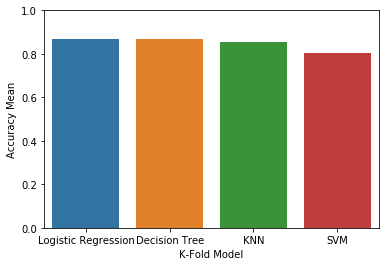

In [ ]:
#Stratified K-fold Model Accuracy Table
kfold_models=pd.DataFrame({'K-Fold Model':['Logistic Regression','Decision Tree','KNN','SVM'],'Accuracy Mean':[lr_avg,tree_avg,knn_avg,svm_avg],'Accuracy SD':[lr_sd,tree_sd,knn_sd,svm_sd]})
bar_plt=sns.barplot('K-Fold Model','Accuracy Mean',data=kfold_models)
bar_plt.set(ylim=(0,1))
kfold_models

On applying Stratified K fold Cross Validation in the above Standalone Models

Decision tree & Logistic Regression performs better with 86.7% accuracy in test data

,Ensemble Model,Test Accuracy
0,Bagging,0.796610
1,Ada Boosting,0.830508
2,Gradient Boosting,0.796610
3,Random Forest,0.830508


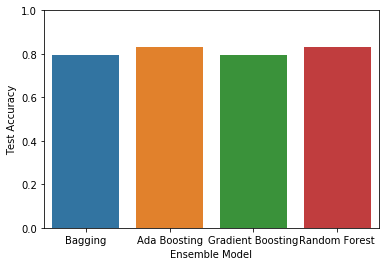

In [ ]:
# Ensemble Model Accuracy Table
ensemble_models=pd.DataFrame({'Ensemble Model':['Bagging','Ada Boosting','Gradient Boosting','Random Forest'],'Test Accuracy':[bag_acc,abc_acc,gbc_acc,rfc_acc]})
bar_plt=sns.barplot('Ensemble Model','Test Accuracy',data=ensemble_models)
bar_plt.set(ylim=(0,1))
ensemble_models

Among 4 ensemble models, Random forest and Ada boosting performed better with 83.05% accuracy in test data

In [ ]:
# Stacking model Accuracy Table
stack_model=pd.DataFrame({'Stacking Model':['Voting Classifier'],'Test Accuracy':[stack_acc]})
stack_model

,Stacking Model,Test Accuracy
0,Voting Classifier,0.847458


From the above models(4 standalone models, 4 stratified K fold validation model, 4 ensemble models and 1 stacking model), Logistic Regression with Stratified K-Fold cross validation model performs better with 86.7% acuracy in test data